# Tidy Data in Python
This is a short quiz to help Data Analysts flex basic Exploratory Data Analysis skills.

## Libraries!
Always get libraries first

In [1]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

## Getting the Data
For this exercise, we're going to call the NASA API. We can get 7 days of asteriod data at a time using the [DEMO_KEY](https://api.nasa.gov/index.html#getting-started):

In [2]:
# make this call separately from everything as the DEMO_KEY is limited to 30 hits from an API every hour.
response = requests.get("https://api.nasa.gov/neo/rest/v1/feed?start_date=2019-07-01&end_date=2019-07-07&api_key=DEMO_KEY")

In [3]:
if(response.status_code != 200):
    print("Invalid URL; cannot get data")
else:
    rawdata = response.json()
    print(type(rawdata))

<class 'dict'>


## Now Tidy the Data!

In [4]:
near_earth_objects = rawdata['near_earth_objects']
type(near_earth_objects)

dict

In [5]:
July2Asteroids = near_earth_objects['2019-07-02']
type(July2Asteroids)

list

In [6]:
July2Asteroid1 = July2Asteroids[0]
type(July2Asteroid1)

dict

In [7]:
July2Asteroid1_df = pd.DataFrame.from_dict(json_normalize(July2Asteroid1))

In [8]:
for ast in near_earth_objects.items():
    astDate = ast[0]
    astData = ast[1]
    print(type(astDate), type(astData))
    break

<class 'str'> <class 'list'>


In [9]:
for ast in near_earth_objects.items():
    astDate = ast[0]
    for event in ast[1]:
        print(astDate, type(event))
        break
    break

2019-07-02 <class 'dict'>


In [10]:
finaldf = pd.DataFrame()
for ast in near_earth_objects.items():
    astDate = ast[0]
    for event in ast[1]:
        tempdf = pd.DataFrame.from_dict(json_normalize(event)).assign(event_date=astDate)
        finaldf = finaldf.append(tempdf)

In [11]:
finaldf.head()

,absolute_magnitude_h,close_approach_data,estimated_diameter.feet.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,id,is_potentially_hazardous_asteroid,is_sentry_object,links.self,name,nasa_jpl_url,neo_reference_id,event_date
0,25.454,"[{'close_approach_date': '2019-07-02', 'close_...",158.206758,70.752213,0.048221,0.021565,48.221418,21.565274,0.029963,0.013400,3843052,False,False,http://www.neowsapp.com/rest/v1/neo/3843052?ap...,(2019 MJ2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3843052,3843052,2019-07-02
0,21.558,"[{'close_approach_date': '2019-07-02', 'close_...",951.535575,425.539646,0.290028,0.129704,290.028034,129.704480,0.180215,0.080595,3843118,False,False,http://www.neowsapp.com/rest/v1/neo/3843118?ap...,(2019 NO1),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3843118,3843118,2019-07-02
0,30.087,"[{'close_approach_date': '2019-07-02', 'close_...",18.733763,8.377994,0.005710,0.002554,5.710051,2.553612,0.003548,0.001587,3843113,False,False,http://www.neowsapp.com/rest/v1/neo/3843113?ap...,(2019 NK1),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3843113,3843113,2019-07-02
0,22.709,"[{'close_approach_date': '2019-07-02', 'close_...",560.047715,250.460952,0.170703,0.076340,170.702538,76.340496,0.106070,0.047436,3843089,False,False,http://www.neowsapp.com/rest/v1/neo/3843089?ap...,(2019 MR3),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3843089,3843089,2019-07-02
0,26.478,"[{'close_approach_date': '2019-07-02', 'close_...",98.724520,44.150947,0.030091,0.013457,30.091233,13.457208,0.018698,0.008362,3842937,False,False,http://www.neowsapp.com/rest/v1/neo/3842937?ap...,(2019 MD1),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3842937,3842937,2019-07-02


In [12]:
finaldf_shape = finaldf.groupby(['event_date']).count().reset_index()

In [13]:
event_plot_data = finaldf_shape[['event_date', 'id']].rename(columns={'id': 'event_count'})

Text(0, 0.5, 'Event Count')

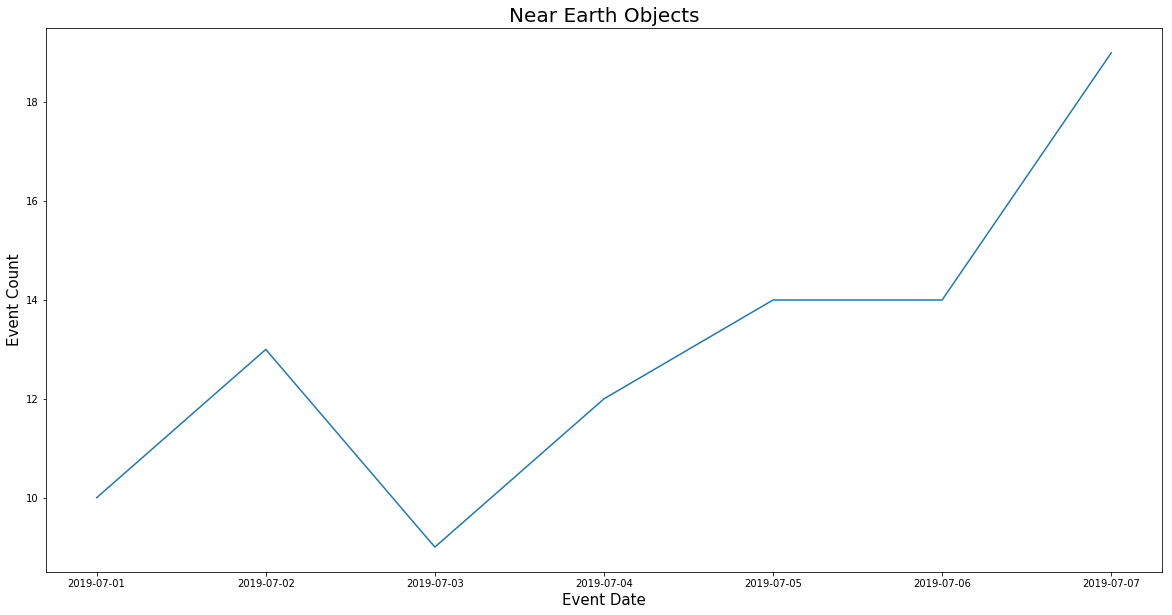

In [28]:
plt.rcParams['figure.figsize'] = (20,10)
event_plot = plt.plot(event_plot_data['event_date'], event_plot_data['event_count'])
plt.title('Near Earth Objects', fontsize=20)
plt.xlabel('Event Date',fontsize=15)
plt.ylabel('Event Count',fontsize=15)